In [1]:

import numpy as np


from sklearn.naive_bayes import GaussianNB

from sklearn.cross_validation import train_test_split
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve,auc

%matplotlib inline

# Loading data set in to pandas dataframe

In [2]:
data = pd.read_csv("Machine_learning\ischaemic_heart.csv")
data.head()

,breathlessness,chest pain,palpitation,cough,dizziness,fatigue,swelling of feet,cyanosis,abdomen pain,appetite loss,weight gain,facial puffiness,syncope,ischaemic heart disease
0,75,65,0,20,10,35,0,0,0,0,0,0,23,1
1,56,70,14,0,0,35,10,4,0,0,20,10,14,1
2,23,45,0,0,0,0,0,0,46,36,0,0,0,0
3,14,0,12,0,0,0,10,12,13,0,35,0,14,0
4,10,10,10,10,0,0,13,0,12,0,15,15,13,0


In [3]:
#data.info()

# taking out features from the dataframe

# Labels from the dataframe

In [4]:
labels =data.iloc[:,[13]]
labels.head()

,ischaemic heart disease
0,1
1,1
2,0
3,0
4,0


In [5]:
test=data.iloc[:5,[0,1,2,3,4,5,6,7,8,9,10,11,12]]
test.head()

print("-------------------------------------------------------")

test_label=data.iloc[:5,[13]]
test_label.head()

-------------------------------------------------------


,ischaemic heart disease
0,1
1,1
2,0
3,0
4,0


# Naive Bayes Classifier

             precision    recall  f1-score   support

          0       0.96      0.94      0.95        77
          1       0.94      0.97      0.96        88

avg / total       0.95      0.95      0.95       165

[[72  5]
 [ 3 85]]


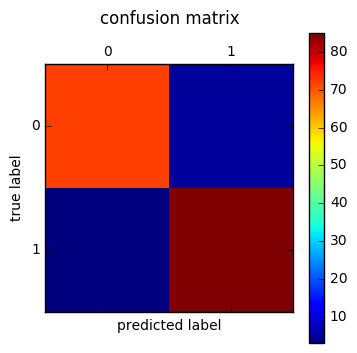

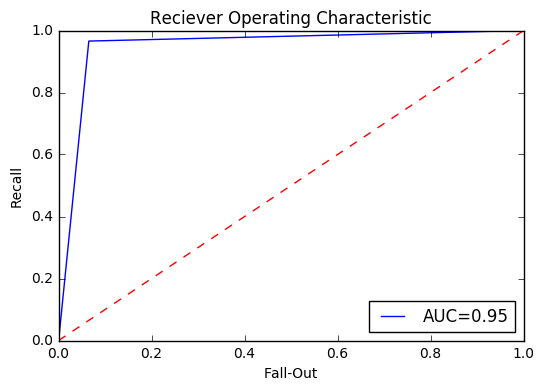

In [6]:
X_train,X_test,y_train,y_test = train_test_split(data[list(data.columns)[:-1]],data[list(data.columns)[-1]],test_size=0.25)
clf =GaussianNB()
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))


c_m=confusion_matrix(y_test,y_pred)
print (c_m)
plt.matshow(c_m)
plt.title('confusion matrix\n')
plt.colorbar()
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.show()


fpr,recall,thres=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,recall)
plt.title('Reciever Operating Characteristic')
plt.plot(fpr,recall,'b',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-Out')
plt.show()

In [7]:
print(y_pred)

[0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0
 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1
 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1
 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1]


from sklearn.metrics import f1_score
f1_score(test_label,pred)

# SVM Classifier

             precision    recall  f1-score   support

          0       0.96      0.94      0.95        77
          1       0.94      0.97      0.96        88

avg / total       0.95      0.95      0.95       165

[[72  5]
 [ 3 85]]


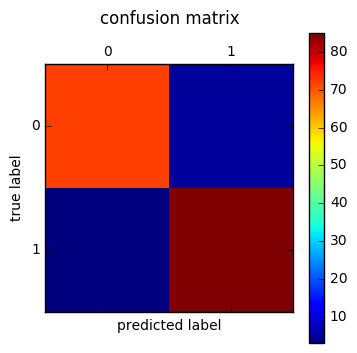

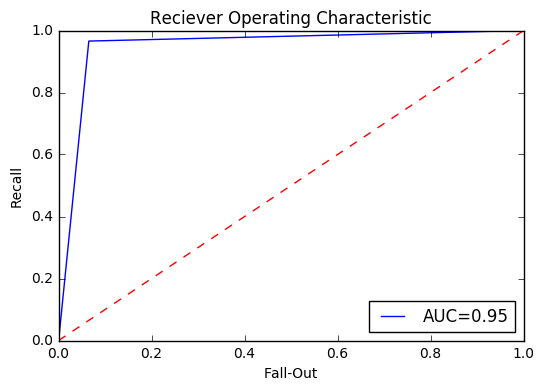

In [8]:
from sklearn import svm
clf=svm.SVC()
clf=clf.fit(X_train,y_train)
y_pred0=clf.predict(X_test)

print(classification_report(y_test,y_pred))


c_m=confusion_matrix(y_test,y_pred)
print (c_m)
plt.matshow(c_m)
plt.title('confusion matrix\n')
plt.colorbar()
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.show()


fpr,recall,thres=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,recall)
plt.title('Reciever Operating Characteristic')
plt.plot(fpr,recall,'b',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-Out')
plt.show()

# Logistic Regression

In [11]:
from sklearn import linear_model
regression = linear_model.LinearRegression()
regression = regression.fit(X_train,y_train)
pred1=regression.predict(X_test)

print(classification_report(y_test,pred1))

c_m=confusion_matrix(y_test,y_pred)
print (c_m)
plt.matshow(c_m)
plt.title('confusion matrix\n')
plt.colorbar()
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.show()


fpr,recall,thres=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,recall)
plt.title('Reciever Operating Characteristic')
plt.plot(fpr,recall,'b',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-Out')
plt.show()


ValueError: Mix type of y not allowed, got types {'binary', 'continuous'}

# KNN Classifier

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        77
          1       1.00      1.00      1.00        88

avg / total       1.00      1.00      1.00       165

[[72  5]
 [ 3 85]]


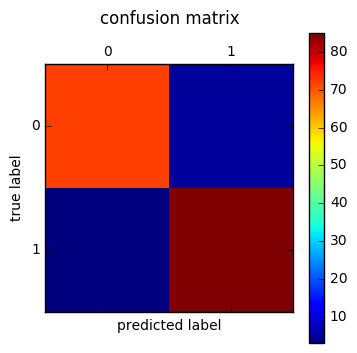

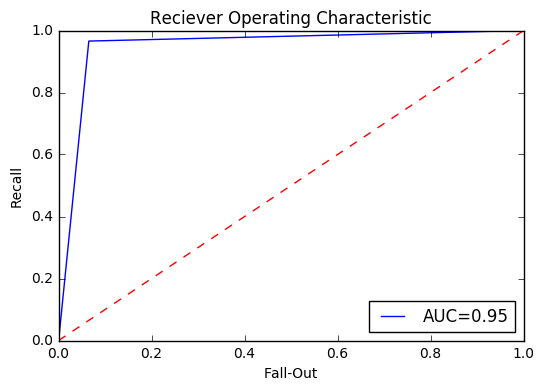

In [10]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=2)
neigh =neigh.fit(X_train,y_train)

pred2=clf.predict(X_test)

print(classification_report(y_test,pred2))


c_m=confusion_matrix(y_test,y_pred)
print (c_m)
plt.matshow(c_m)
plt.title('confusion matrix\n')
plt.colorbar()
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.show()


fpr,recall,thres=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,recall)
plt.title('Reciever Operating Characteristic')
plt.plot(fpr,recall,'b',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-Out')
plt.show()

# Decision Tree Classifier

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        78
          1       1.00      1.00      1.00        87

avg / total       1.00      1.00      1.00       165

[[71  7]
 [ 8 79]]


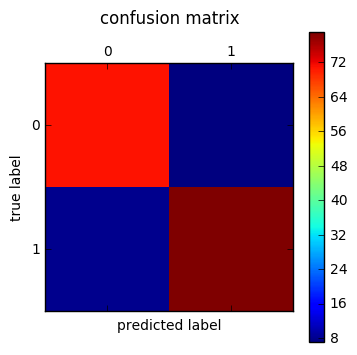

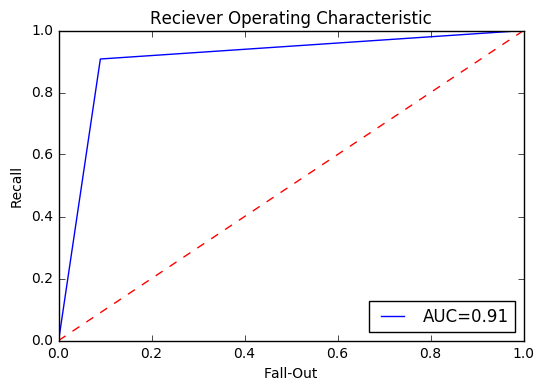

In [27]:
#from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf =clf.fit(X_train,y_train)

pred3=clf.predict(X_test)

print(classification_report(y_test,pred3))

c_m=confusion_matrix(y_test,y_pred)
print (c_m)
plt.matshow(c_m)
plt.title('confusion matrix\n')
plt.colorbar()
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.show()


fpr,recall,thres=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,recall)
plt.title('Reciever Operating Characteristic')
plt.plot(fpr,recall,'b',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-Out')
plt.show()

In [53]:
f1=open("Machine_learning\dis_vs_symtom.txt",'r')
text=f1.read()

f2=open("Machine_learning\dis_vs_symtom.txt",'r')
text2=f2.read()

In [78]:
#conversion of the .txt data  into  the  array of the strings

features=[]
labels=[]

x= text.split('\n')

#print(x[0].split(",")[1])
#print(x[0].split(",")[2])

for i in range(0,len(x)):
    features.append(x[i].split(",")[1:])
    labels.append(x[i].split(",")[:1])
    labels[i]=labels[i][0]
print(labels[14])
print(features[14]);

Rickets
['irritability', ' delayed development', ' sweating in forehead', ' poor dentition', ' tetany', ' swelling of wrists', ' craniotabes', ' big anterior fontanelle ', ' pot belly', 'small nose', ' protruding tongue.']


In [86]:
f1=open("C:/xampp/htdocs/ashu/symptoms.txt",'r')
symptoms_user=f1.read()
x= symptoms_user.split(',')
print(x)

[' irritability', ' coarse hair', 'sweating in forehead', 'poor dentition', 'tetany', 'swelling of wrists', 'craniotabes', 'big anterior fontanelle', 'irritability', 'chills', 'sweating', 'delayed development']


In [87]:
#pneumonia
#Rickets

symptom=['breathlessness', 'wheezing', 'cough', 'chest pain', 'cyanosis', 'neck stiffness', 'appetite loss', 'loss of weight', 'feet oedema', 'hoarseness of voice', 'fatigue', 'chills']
#symptom=['irritability', 'wheezing', 'cough', 'chest pain', 'cyanosis',' craniotabes', ' big anterior fontanelle ', ' pot belly', 'small nose', ' protruding tongue.'];
max=[]
s=0
k=0
a=0
for k in range(0,len(features)):
    for j in range(0,len(symptom)):
        for i in range(0,len(features[k])):
            if((features[k][i])==(symptom[j])):
                print(features[k][i])
                print("matched with ")
                print(symptom[j])
                max.append(k)
                
                
                
            
            else:
                print(features[k][i])
                print("not matched with ")
                print(symptom[j])
        
    
    

breathlessness
matched with 
breathlessness
chest pain
not matched with 
breathlessness
palpitation
not matched with 
breathlessness
cough
not matched with 
breathlessness
dizzines
not matched with 
breathlessness
fatigue
not matched with 
breathlessness
swelling of feet
not matched with 
breathlessness
cyanosis
not matched with 
breathlessness
abdomen
not matched with 
breathlessness
pain
not matched with 
breathlessness
appetite loss
not matched with 
breathlessness
weight gain
not matched with 
breathlessness
facial puffiness
not matched with 
breathlessness
syncope
not matched with 
breathlessness
breathlessness
not matched with 
wheezing
chest pain
not matched with 
wheezing
palpitation
not matched with 
wheezing
cough
not matched with 
wheezing
dizzines
not matched with 
wheezing
fatigue
not matched with 
wheezing
swelling of feet
not matched with 
wheezing
cyanosis
not matched with 
wheezing
abdomen
not matched with 
wheezing
pain
not matched with 
wheezing
appetite loss
not mat

In [88]:
#following code creates an external file  and  appends  the  symptoms narrowing the disease
print((max))
percent=0
count=0
temp=0
result=[]
distinct =[]


file=open("Machine_learning/user_symptom.txt",'w')

for j in range(0, len(max)):
    count=0;
    for i in range(0,len(max)):
        if(max[j]==max[i]):
            count+=1;
    result.append((labels[max[j]],(count/len(symptom))*100))
    file.write(labels[max[j]])
    file.write(' %d \n ' % ((count/len(symptom))*100))
    #result.append(count)
    #print(labels[max[j]],count," times")
    j=count+1

    

   
#print(set(result))
distinct.append(set(result))
print(distinct)
print(len(symptom))
print(count)
file.close()



[0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 7, 9, 10, 10, 12, 12, 13, 13]
[{('Tuberculosis', 16.666666666666664), ('Anaemia', 16.666666666666664), ('Nephrotic syndrome Ascites', 8.333333333333332), ('meningitis', 8.333333333333332), ('Diabetes', 8.333333333333332), ('bronchial asthma', 100.0), ('Malaria', 16.666666666666664), ('pneumonia', 91.66666666666666), ('Paraplegia', 16.666666666666664), ('ischaemic heart disease', 50.0)}]
12
2


In [89]:
#external file creation and writing
user=open("Machine_learning/user_symptom.txt",'r')
narrow=user.read()

fea=[]
lab=[]

x= narrow.split('\n')

#print(x[0].split(",")[1])
#print(x[0].split(",")[2])

for i in range(0,len(x)-1):
    lab.append(x[i].split(",")[:1])
    lab[i]=lab[i][0]


#print(lab)

for j in range(0,len(x)-1):
    for i in range(0,len(x)-1):
        if(lab[j]==lab[i]):
            break;
    
        
        
#print(lab[0][-3:-2])   this is the  logic of checking first letter of numeric value 

    fnarrow=open("Machine_learning/narrow_symptom.txt",'w') #creating final narrowed down sypmtom .txt
        
for m in range(0,len(lab)-1):
    if(lab[m]!=lab[m+1]):
        if(lab[m][-3:-2]=='9' or lab[m][-3:-2]=='8' or lab[m][-3:-2]=='7' or lab[m][-3:-2]=='6' or lab[m][-3:-3]=='1'):
            print(lab[m][:-3])
            fnarrow.write(lab[m][:-3])
            
            
if(lab[m][-3:-2]=='9' or lab[m][-3:-2]=='8' or lab[m][-3:-2]=='7' or lab[m][-3:-2]=='6' or lab[m][-3:-3]=='1'):
    print(lab[m][:-3])
    fnarrow.write(lab[m][:-3])
        

        

#print(len(lab))
print(lab)
#print(lab[m][:-3])
fnarrow.close()    
user.close();        
    


        

 
 

 pneumonia 
['ischaemic heart disease 50 ', ' ischaemic heart disease 50 ', ' ischaemic heart disease 50 ', ' ischaemic heart disease 50 ', ' ischaemic heart disease 50 ', ' ischaemic heart disease 50 ', ' meningitis 8 ', ' bronchial asthma 100 ', ' bronchial asthma 100 ', ' bronchial asthma 100 ', ' bronchial asthma 100 ', ' bronchial asthma 100 ', ' bronchial asthma 100 ', ' bronchial asthma 100 ', ' bronchial asthma 100 ', ' bronchial asthma 100 ', ' bronchial asthma 100 ', ' bronchial asthma 100 ', ' bronchial asthma 100 ', ' pneumonia 91 ', ' pneumonia 91 ', ' pneumonia 91 ', ' pneumonia 91 ', ' pneumonia 91 ', ' pneumonia 91 ', ' pneumonia 91 ', ' pneumonia 91 ', ' pneumonia 91 ', ' pneumonia 91 ', ' pneumonia 91 ', ' Paraplegia 16 ', ' Paraplegia 16 ', ' Nephrotic syndrome Ascites 8 ', ' Diabetes 8 ', ' Anaemia 16 ', ' Anaemia 16 ', ' Tuberculosis 16 ', ' Tuberculosis 16 ', ' Malaria 16 ', ' Malaria 16 ']


In [90]:
fnarrow=open("Machine_learning/narrow_symptom.txt",'r')
ques=open("Machine_learning/ques_ans.txt",'w')    #it stores the symptoms which is required to be used in questionair
sym=fnarrow.read()
only_sym=sym[:(len(lab)-2)]

for i in range(0,len(labels)):
    if(labels[i]==only_sym or labels[i]==only_sym[1:] or labels[i]==only_sym[1:-1] or labels[i]==only_sym[:-1] or labels[i]==only_sym[:-2]):
        print(features[i])
        for j in range(0,len(features[i])):
            ques.write(features[i][j])
            if(j!=len(features[i])-1):
                ques.write(",")
ques.close()
fnarrow.close()
print(len(labels))
#print(only_sym)


['high fever', 'breathlessness', 'chest pain', 'chills', 'cough', 'neck stiffness', 'hoarseness of voice', 'cyanosis', 'fatigue', 'appetite loss', 'loss of weight', 'wheezing', 'feet', 'oedema']
17


In [91]:
for k in range(0,len(features)):
    for j in range(0,len(symptom)):
        for i in range(0,len(features[k])):
            if(j+i>=i):
                print(k," , ",i ,"     , ",j)

0  ,  0      ,  0
0  ,  1      ,  0
0  ,  2      ,  0
0  ,  3      ,  0
0  ,  4      ,  0
0  ,  5      ,  0
0  ,  6      ,  0
0  ,  7      ,  0
0  ,  8      ,  0
0  ,  9      ,  0
0  ,  10      ,  0
0  ,  11      ,  0
0  ,  12      ,  0
0  ,  13      ,  0
0  ,  0      ,  1
0  ,  1      ,  1
0  ,  2      ,  1
0  ,  3      ,  1
0  ,  4      ,  1
0  ,  5      ,  1
0  ,  6      ,  1
0  ,  7      ,  1
0  ,  8      ,  1
0  ,  9      ,  1
0  ,  10      ,  1
0  ,  11      ,  1
0  ,  12      ,  1
0  ,  13      ,  1
0  ,  0      ,  2
0  ,  1      ,  2
0  ,  2      ,  2
0  ,  3      ,  2
0  ,  4      ,  2
0  ,  5      ,  2
0  ,  6      ,  2
0  ,  7      ,  2
0  ,  8      ,  2
0  ,  9      ,  2
0  ,  10      ,  2
0  ,  11      ,  2
0  ,  12      ,  2
0  ,  13      ,  2
0  ,  0      ,  3
0  ,  1      ,  3
0  ,  2      ,  3
0  ,  3      ,  3
0  ,  4      ,  3
0  ,  5      ,  3
0  ,  6      ,  3
0  ,  7      ,  3
0  ,  8      ,  3
0  ,  9      ,  3
0  ,  10      ,  3
0  ,  11      ,  3
0  ,  12      